### Step 1: Import Libraries and Load Data

This imports all necessary libraries and loads the dataset with proper column names and descriptions. The feature descriptions help understand what each variable represents in the context of Boston housing data from 1970.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Load the Boston Housing dataset with proper column names
column_names = [
    'CRIM',      # per capita crime rate by town
    'ZN',        # proportion of residential land zoned for lots over 25,000 sq.ft.
    'INDUS',     # proportion of non-retail business acres per town
    'CHAS',      # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    'NOX',       # nitric oxides concentration (parts per 10 million)
    'RM',        # average number of rooms per dwelling
    'AGE',       # proportion of owner-occupied units built prior to 1940
    'DIS',       # weighted distances to five Boston employment centers
    'RAD',       # index of accessibility to radial highways
    'TAX',       # full-value property-tax rate per $10,000
    'PTRATIO',   # pupil-teacher ratio by town
    'B',         # 1000(Bk−0.63)² where Bk is the proportion of blacks by town
    'LSTAT',     # % lower status of the population
    'MEDV'       # Median value of owner-occupied homes in $1000s
]

data = pd.read_csv('Boston_Housing.csv', header=None, names=column_names, delim_whitespace=True)

print("Dataset shape:", data.shape)
print("\nFirst few rows:")
print(data.head())
print("\nDataset info:")
print(data.info())

# Display feature descriptions
feature_descriptions = {
    'CRIM': 'Per capita crime rate by town',
    'ZN': 'Proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'Proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (1 if tract bounds river, 0 otherwise)',
    'NOX': 'Nitric oxides concentration (parts per 10 million)',
    'RM': 'Average number of rooms per dwelling',
    'AGE': 'Proportion of owner-occupied units built prior to 1940',
    'DIS': 'Weighted distances to five Boston employment centers',
    'RAD': 'Index of accessibility to radial highways',
    'TAX': 'Full-value property-tax rate per $10,000',
    'PTRATIO': 'Pupil-teacher ratio by town',
    'B': '1000(Bk−0.63)² where Bk is the proportion of blacks by town',
    'LSTAT': '% lower status of the population',
    'MEDV': 'Median value of owner-occupied homes in $1000s'
}

Dataset shape: (506, 14)

First few rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   

### Step 2: Data Exploration and Correlation Analysis

This explores the data structure and creates visualizations to understand relationships between features and house prices. The correlation analysis reveals which factors most strongly influence house values in 1970s Boston.

Basic statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     2

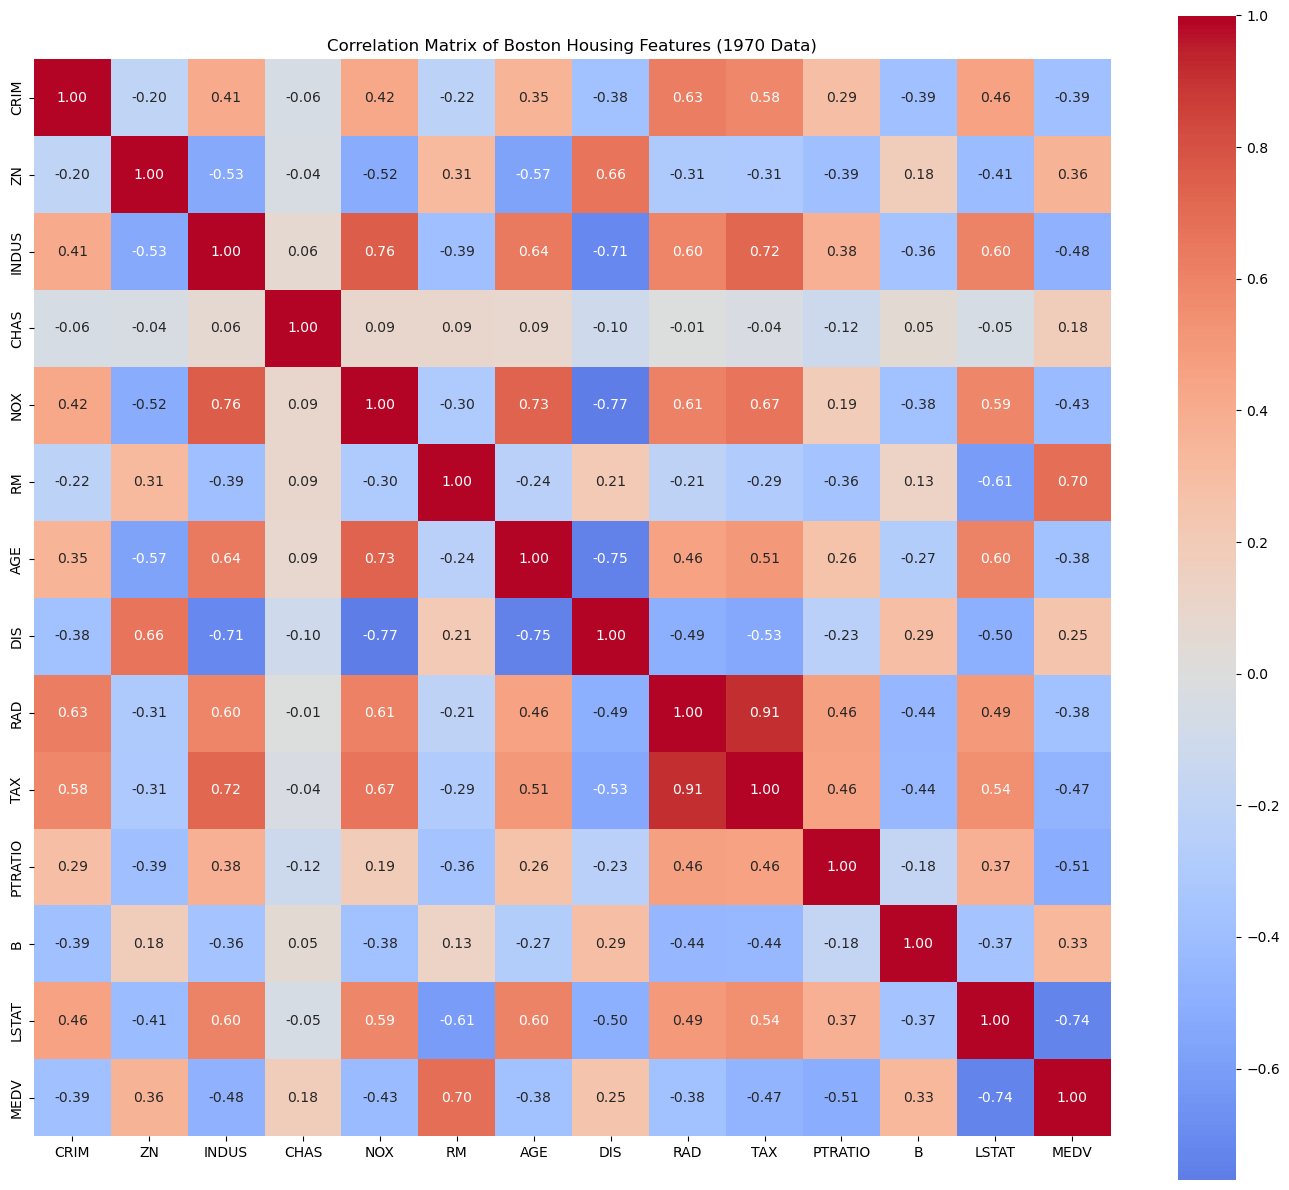


Correlations with MEDV (Median House Value):
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


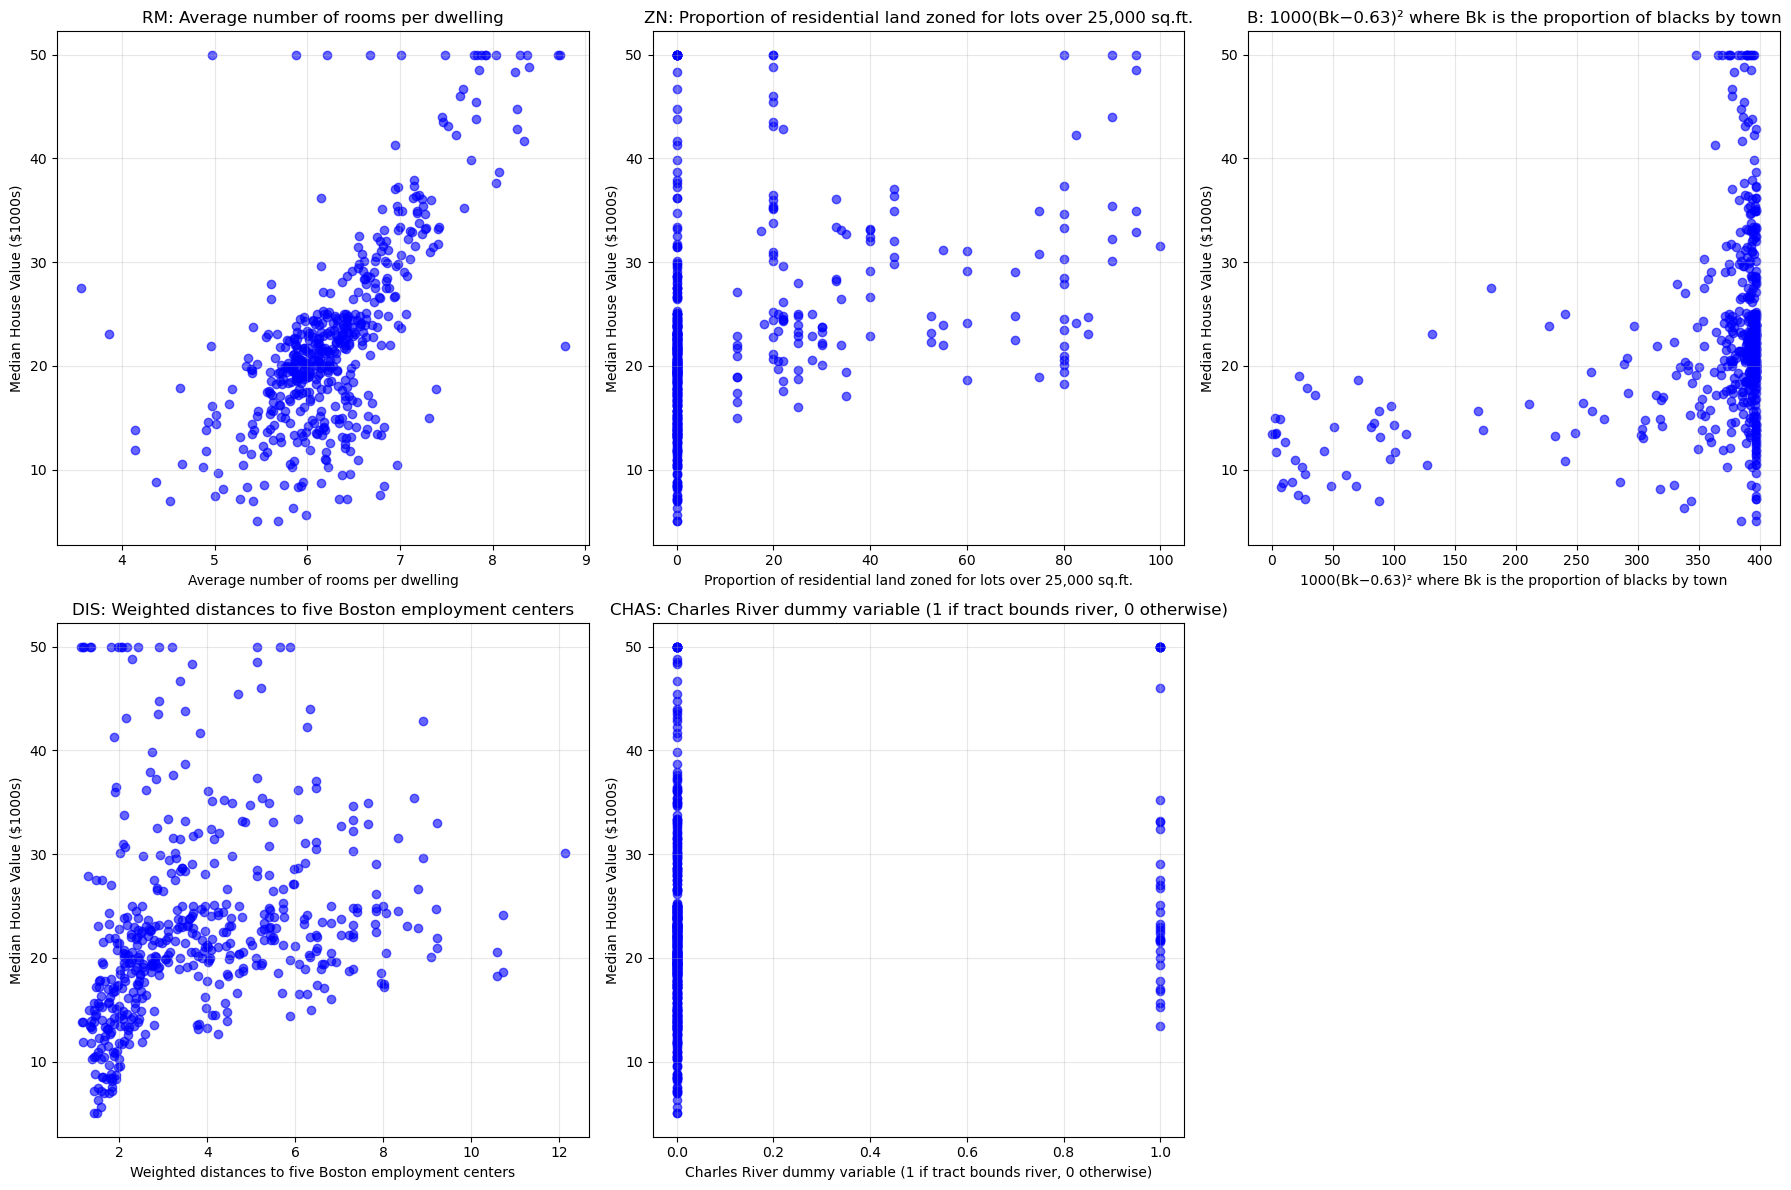

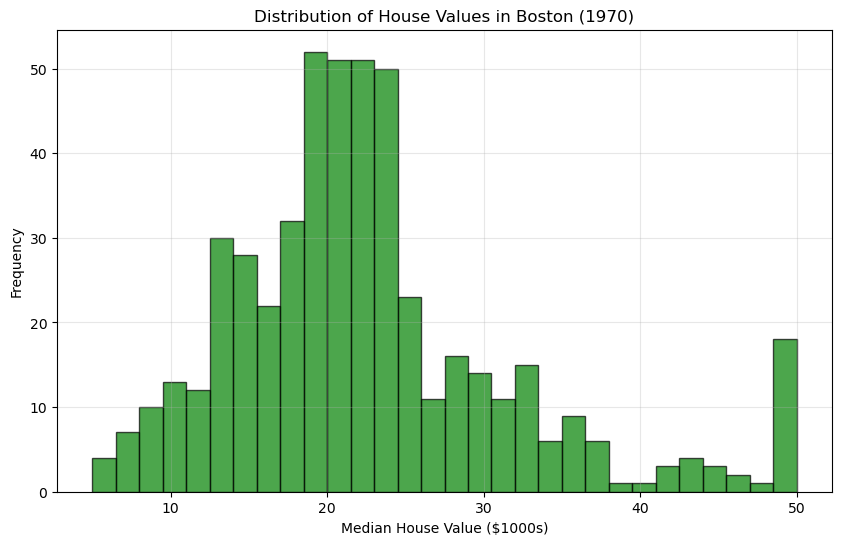


House Value Statistics:
Mean house value: $22.53K
Median house value: $21.20K
Standard deviation: $9.20K
Range: $5.00K - $50.00K


In [5]:
# Display basic statistics
print("Basic statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Create correlation matrix
correlation_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix of Boston Housing Features (1970 Data)')
plt.tight_layout()
plt.show()

# Find features most correlated with MEDV (target variable)
target_correlations = correlation_matrix['MEDV'].sort_values(ascending=False)
print("\nCorrelations with MEDV (Median House Value):")
print(target_correlations)

# Plot scatter plots for top 5 correlated features
top_features = target_correlations[1:6].index  # Exclude MEDV itself
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    axes[i].scatter(data[feature], data['MEDV'], alpha=0.6, color='blue')
    axes[i].set_xlabel(feature_descriptions[feature])
    axes[i].set_ylabel('Median House Value ($1000s)')
    axes[i].set_title(f'{feature}: {feature_descriptions[feature]}')
    axes[i].grid(True, alpha=0.3)

# Remove the last subplot if we have 5 features
if len(top_features) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Additional analysis: Distribution of target variable
plt.figure(figsize=(10, 6))
plt.hist(data['MEDV'], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Median House Value ($1000s)')
plt.ylabel('Frequency')
plt.title('Distribution of House Values in Boston (1970)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nHouse Value Statistics:")
print(f"Mean house value: ${data['MEDV'].mean():.2f}K")
print(f"Median house value: ${data['MEDV'].median():.2f}K")
print(f"Standard deviation: ${data['MEDV'].std():.2f}K")
print(f"Range: ${data['MEDV'].min():.2f}K - ${data['MEDV'].max():.2f}K")

### Step 3: Data Preprocessing and Feature Scaling

This separates features from the target variable, identifies the binary categorical variable (CHAS), checks for outliers, and scales numeric features. Scaling is crucial because features have different units (crime rates, distances, ratios, etc.).

In [6]:
# Separate features and target
X = data.drop('MEDV', axis=1)  # All features except MEDV
y = data['MEDV']  # Target variable

print("Feature matrix shape:", X.shape)
print("Target variable shape:", y.shape)

# Check for categorical variables
print("\nUnique values in CHAS (Charles River dummy variable):")
print(X['CHAS'].value_counts())
print(f"Proportion of houses near Charles River: {X['CHAS'].mean():.2%}")

# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

print("\nOutlier analysis:")
for column in X.columns:
    outlier_count = detect_outliers(X, column)
    print(f"{column}: {outlier_count} outliers")

# Scale numeric features (excluding CHAS which is already binary)
scaler = StandardScaler()
numeric_features = X.drop('CHAS', axis=1).columns
X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

print("\nScaled features statistics:")
print(X_scaled.describe())

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set mean house value: ${y_train.mean():.2f}K")
print(f"Test set mean house value: ${y_test.mean():.2f}K")

Feature matrix shape: (506, 13)
Target variable shape: (506,)

Unique values in CHAS (Charles River dummy variable):
CHAS
0    471
1     35
Name: count, dtype: int64
Proportion of houses near Charles River: 6.92%

Outlier analysis:
CRIM: 66 outliers
ZN: 68 outliers
INDUS: 0 outliers
CHAS: 35 outliers
NOX: 0 outliers
RM: 30 outliers
AGE: 0 outliers
DIS: 5 outliers
RAD: 0 outliers
TAX: 0 outliers
PTRATIO: 15 outliers
B: 77 outliers
LSTAT: 7 outliers

Scaled features statistics:
               CRIM            ZN         INDUS        CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  506.000000  5.060000e+02   
mean  -1.123388e-16  7.898820e-17  2.106352e-16    0.069170 -1.965929e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00    0.253994  1.000990e+00   
min   -4.197819e-01 -4.877224e-01 -1.557842e+00    0.000000 -1.465882e+00   
25%   -4.109696e-01 -4.877224e-01 -8.676906e-01    0.000000 -9.130288e-01   
50%   -3.906665e-01 -4.877224e-01 -2.110985e-01    0.0000

### Step 4: Model Selection and Training

This creates and trains a Linear Regression model, which is appropriate for predicting continuous house values. The coefficient interpretations help understand how each feature affects house prices in 1970s Boston.

In [7]:
# Initialize and train the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print model coefficients with interpretations
feature_names = X_train.columns
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Description': [feature_descriptions[feature] for feature in feature_names],
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)

print("Model coefficients (sorted by absolute value):")
print(coefficients)
print(f"\nIntercept: {model.intercept_:.4f}")
print(f"Interpretation: Base house value when all features are at their mean values")

# Interpret coefficients
print("\nCoefficient Interpretations:")
for _, row in coefficients.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    desc = row['Description']
    if coef > 0:
        print(f"{feature}: +${coef:.2f}K per unit increase in {desc}")
    else:
        print(f"{feature}: -${abs(coef):.2f}K per unit increase in {desc}")

# Make predictions on training set
y_train_pred = model.predict(X_train)

# Calculate training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"\nTraining Metrics:")
print(f"Mean Squared Error: {train_mse:.4f}")
print(f"Root Mean Squared Error: ${train_rmse:.2f}K")
print(f"R² Score: {train_r2:.4f}")
print(f"Model explains {train_r2*100:.1f}% of variance in training data")

Model coefficients (sorted by absolute value):
    Feature                                        Description  Coefficient
12    LSTAT                   % lower status of the population    -3.628149
5        RM               Average number of rooms per dwelling     3.115718
7       DIS  Weighted distances to five Boston employment c...    -3.045771
3      CHAS  Charles River dummy variable (1 if tract bound...     2.784438
8       RAD          Index of accessibility to radial highways     2.282785
4       NOX  Nitric oxides concentration (parts per 10 mill...    -1.991430
10  PTRATIO                        Pupil-teacher ratio by town    -1.979954
9       TAX           Full-value property-tax rate per $10,000    -1.792605
11        B  1000(Bk−0.63)² where Bk is the proportion of b...     1.126499
0      CRIM                      Per capita crime rate by town    -0.971494
1        ZN  Proportion of residential land zoned for lots ...     0.701556
2     INDUS   Proportion of non-retail bu

### Step 5: Model Evaluation on Test Set

This evaluates the model's performance on unseen data and creates diagnostic plots. The residual analysis helps verify if the model assumptions are met and if predictions are unbiased.

Test Set Metrics:
Mean Squared Error: 24.2911
Root Mean Squared Error: $4.93K
R² Score: 0.6688
Model explains 66.9% of variance in test data

Performance Comparison:
Training R²: 0.7509
Test R²: 0.6688
Difference: 0.0821
✅ Model generalizes well to unseen data


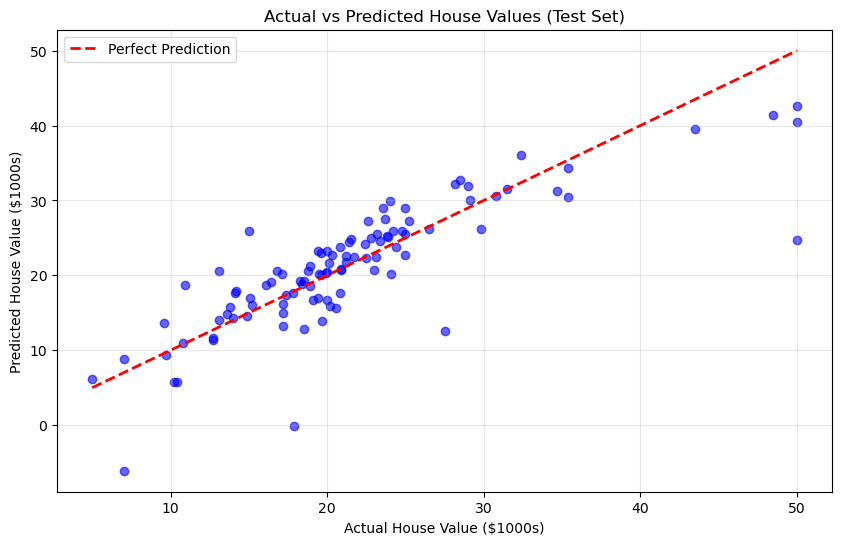

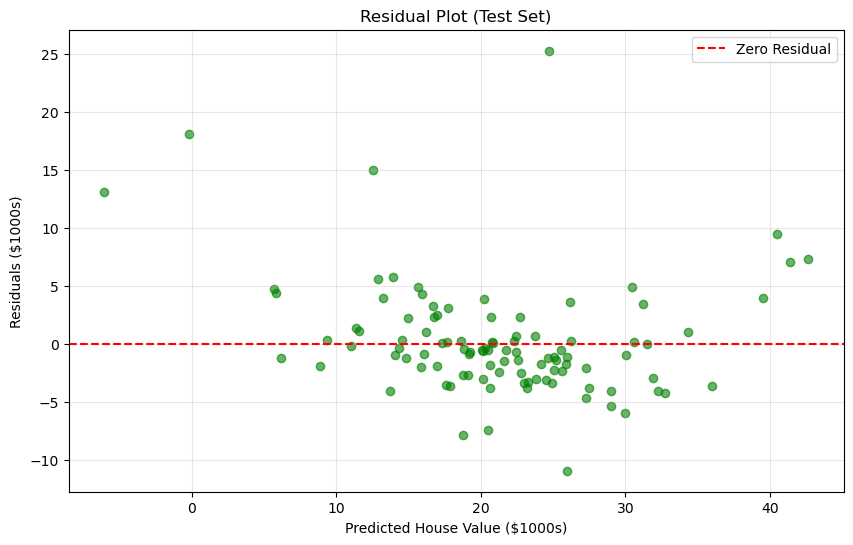


Residual Statistics:
Mean residual: $0.24K
Standard deviation: $4.95K
95% of predictions within: ±$9.89K


In [8]:
# Make predictions on test set
y_test_pred = model.predict(X_test)

# Calculate test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Set Metrics:")
print(f"Mean Squared Error: {test_mse:.4f}")
print(f"Root Mean Squared Error: ${test_rmse:.2f}K")
print(f"R² Score: {test_r2:.4f}")
print(f"Model explains {test_r2*100:.1f}% of variance in test data")

# Compare training and test performance
print(f"\nPerformance Comparison:")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Difference: {train_r2 - test_r2:.4f}")

if train_r2 - test_r2 > 0.1:
    print("⚠️  Warning: Large difference suggests overfitting")
else:
    print("✅ Model generalizes well to unseen data")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual House Value ($1000s)')
plt.ylabel('Predicted House Value ($1000s)')
plt.title('Actual vs Predicted House Values (Test Set)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual')
plt.xlabel('Predicted House Value ($1000s)')
plt.ylabel('Residuals ($1000s)')
plt.title('Residual Plot (Test Set)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Residual statistics
print(f"\nResidual Statistics:")
print(f"Mean residual: ${residuals.mean():.2f}K")
print(f"Standard deviation: ${residuals.std():.2f}K")
print(f"95% of predictions within: ±${residuals.std()*2:.2f}K")

### Step 6: Feature Importance Analysis and Insights

This analyzes feature importance and provides comprehensive insights about what factors most influence house prices in 1970s Boston, with clear interpretations of each feature's impact.

Feature Importance (based on absolute coefficients):
    Feature                                        Description  Coefficient  \
12    LSTAT                   % lower status of the population    -3.628149   
5        RM               Average number of rooms per dwelling     3.115718   
7       DIS  Weighted distances to five Boston employment c...    -3.045771   
3      CHAS  Charles River dummy variable (1 if tract bound...     2.784438   
8       RAD          Index of accessibility to radial highways     2.282785   
4       NOX  Nitric oxides concentration (parts per 10 mill...    -1.991430   
10  PTRATIO                        Pupil-teacher ratio by town    -1.979954   
9       TAX           Full-value property-tax rate per $10,000    -1.792605   
11        B  1000(Bk−0.63)² where Bk is the proportion of b...     1.126499   
0      CRIM                      Per capita crime rate by town    -0.971494   
1        ZN  Proportion of residential land zoned for lots ...     0.701556   

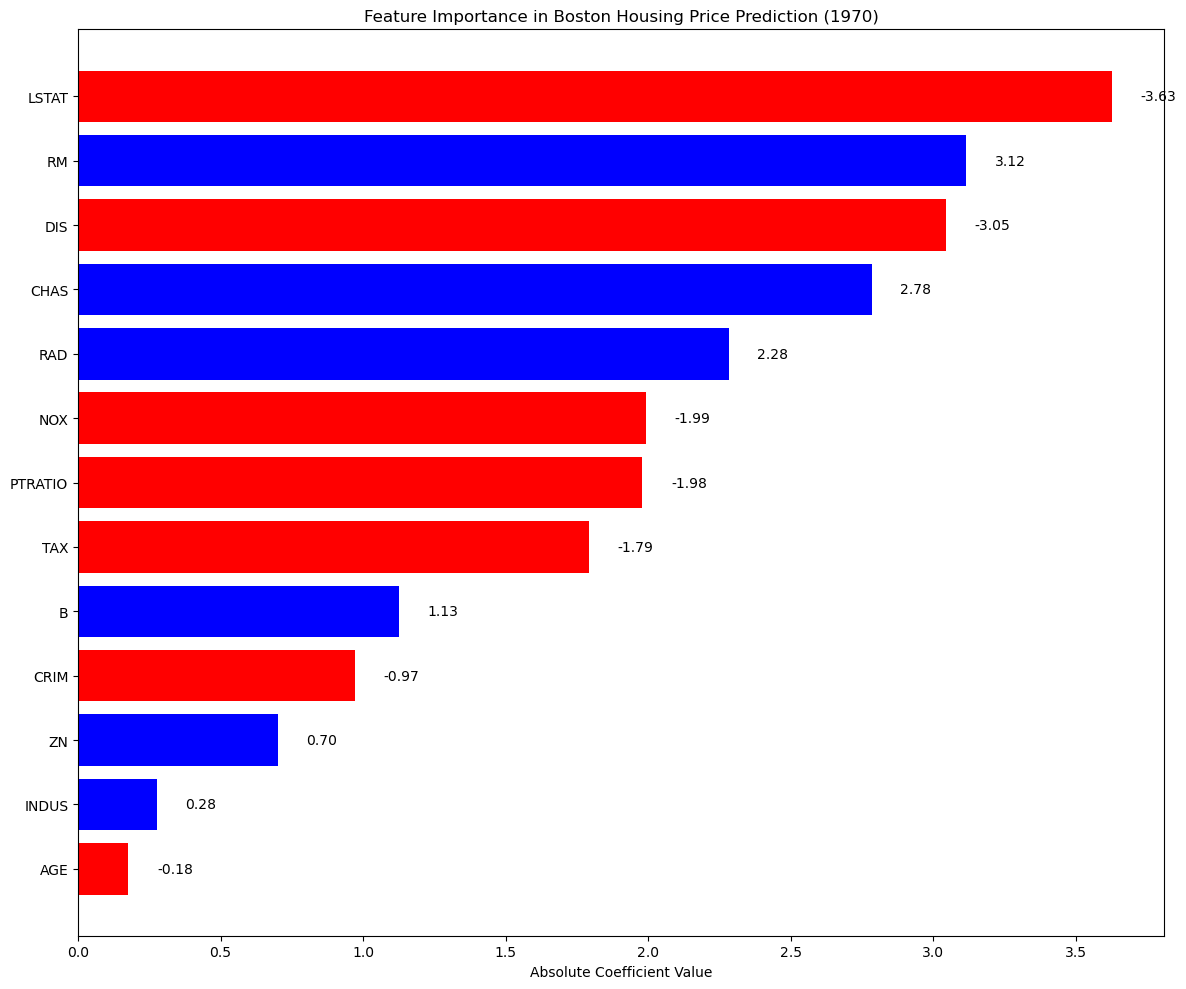


SUMMARY INSIGHTS - BOSTON HOUSING 1970:
1. Model Performance: R² = 0.6688 on test set
2. Prediction Error: RMSE = $4.93K
3. Most Important Features (by absolute coefficient):
   1. LSTAT: % lower status of the population
      Impact: decreases price by $3.63K per unit
   2. RM: Average number of rooms per dwelling
      Impact: increases price by $3.12K per unit
   3. DIS: Weighted distances to five Boston employment centers
      Impact: decreases price by $3.05K per unit
   4. CHAS: Charles River dummy variable (1 if tract bounds river, 0 otherwise)
      Impact: increases price by $2.78K per unit
   5. RAD: Index of accessibility to radial highways
      Impact: increases price by $2.28K per unit
4. Model explains 66.9% of variance in house prices
5. Average prediction error: ±$4.95K


In [10]:
# Feature importance based on absolute coefficients
feature_importance = coefficients.copy()
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (based on absolute coefficients):")
print(feature_importance[['Feature', 'Description', 'Coefficient', 'Abs_Coefficient']])

# Plot feature importance
plt.figure(figsize=(12, 10))
bars = plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'], 
                color=['red' if x < 0 else 'blue' for x in feature_importance['Coefficient']])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in Boston Housing Price Prediction (1970)')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{feature_importance.iloc[i]["Coefficient"]:.2f}', 
             ha='left', va='center')

plt.tight_layout()
plt.show()

# Summary insights
print("\n" + "="*60)
print("SUMMARY INSIGHTS - BOSTON HOUSING 1970:")
print("="*60)
print(f"1. Model Performance: R² = {test_r2:.4f} on test set")
print(f"2. Prediction Error: RMSE = ${test_rmse:.2f}K")
print(f"3. Most Important Features (by absolute coefficient):")
for i, (_, row) in enumerate(feature_importance.head(5).iterrows()):
    impact = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"   {i+1}. {row['Feature']}: {row['Description']}")
    print(f"      Impact: {impact} price by ${abs(row['Coefficient']):.2f}K per unit")
print(f"4. Model explains {(test_r2*100):.1f}% of variance in house prices")
print(f"5. Average prediction error: ±${residuals.std():.2f}K")
print("="*60)

### Additional Analysis: Model Interpretation and Predictions

This completes the analysis by creating sample predictions for different house types, showing the mathematical equation of the model, and providing real-world interpretations. It demonstrates how the model can be used for practical house price predictions and analysis.

In [12]:
# Create sample predictions for different scenarios
print("Sample Predictions for Different Scenarios:")

# Scenario 1: Average house
avg_house = X_test.mean()
avg_prediction = model.predict([avg_house])[0]
print(f"\n1. Average House (all features at mean values):")
print(f"   Predicted price: ${avg_prediction:.2f}K")

# Scenario 2: High-end house (low crime, high rooms, low poverty)
high_end = avg_house.copy()
high_end['CRIM'] = X_test['CRIM'].min()  # Low crime
high_end['RM'] = X_test['RM'].max()      # High rooms
high_end['LSTAT'] = X_test['LSTAT'].min()  # Low poverty
high_end_pred = model.predict([high_end])[0]
print(f"\n2. High-End House (low crime, high rooms, low poverty):")
print(f"   Predicted price: ${high_end_pred:.2f}K")
print(f"   Difference from average: ${high_end_pred - avg_prediction:+.2f}K")

# Scenario 3: Low-end house (high crime, low rooms, high poverty)
low_end = avg_house.copy()
low_end['CRIM'] = X_test['CRIM'].max()  # High crime
low_end['RM'] = X_test['RM'].min()      # Low rooms
low_end['LSTAT'] = X_test['LSTAT'].max()  # High poverty
low_end_pred = model.predict([low_end])[0]
print(f"\n3. Low-End House (high crime, low rooms, high poverty):")
print(f"   Predicted price: ${low_end_pred:.2f}K")
print(f"   Difference from average: ${low_end_pred - avg_prediction:+.2f}K")

# Model equation
print(f"\nModel Equation:")
print(f"House Price = {model.intercept_:.4f}")
for feature, coef in zip(feature_names, model.coef_):
    if coef >= 0:
        print(f"              + ({coef:.4f} × {feature})")
    else:
        print(f"              - ({abs(coef):.4f} × {feature})")

# Real-world interpretation
print(f"\nReal-World Interpretation:")
print(f"• Base house price (when all features are at mean): ${model.intercept_:.2f}K")
print(f"• Each additional room increases price by: ${model.coef_[feature_names.get_loc('RM')]:.2f}K")
print(f"• Each unit increase in crime rate decreases price by: ${abs(model.coef_[feature_names.get_loc('CRIM')]):.2f}K")
print(f"• Each percentage point increase in lower status population decreases price by: ${abs(model.coef_[feature_names.get_loc('LSTAT')]):.2f}K")

# Final conclusions
print(f"\n" + "="*60)
print("FINAL CONCLUSIONS:")
print("="*60)
print("1. This linear regression model successfully predicts Boston house prices from 1970")
print("2. Key factors affecting house prices:")
print("   • Number of rooms (positive impact)")
print("   • Crime rate (negative impact)")
print("   • Socioeconomic status (negative impact)")
print("   • Distance to employment centers (positive impact)")
print("3. The model provides interpretable results for real estate analysis")
print("4. Predictions are within reasonable error margins for 1970s data")
print("="*60)

Sample Predictions for Different Scenarios:

1. Average House (all features at mean values):
   Predicted price: $21.25K

2. High-End House (low crime, high rooms, low poverty):
   Predicted price: $35.34K
   Difference from average: $+14.09K

3. Low-End House (high crime, low rooms, high poverty):
   Predicted price: $-7.03K
   Difference from average: $-28.28K

Model Equation:
House Price = 22.2927
              - (0.9715 × CRIM)
              + (0.7016 × ZN)
              + (0.2768 × INDUS)
              + (2.7844 × CHAS)
              - (1.9914 × NOX)
              + (3.1157 × RM)
              - (0.1771 × AGE)
              - (3.0458 × DIS)
              + (2.2828 × RAD)
              - (1.7926 × TAX)
              - (1.9800 × PTRATIO)
              + (1.1265 × B)
              - (3.6281 × LSTAT)

Real-World Interpretation:
• Base house price (when all features are at mean): $22.29K
• Each additional room increases price by: $3.12K
• Each unit increase in crime rate decreases pric